# Homework 11: Classification, Two-Sample Tests, and Tables Review

Please complete this notebook by filling in the cells provided. When you’re done, follow the instructions in [this short explainer video](https://www.youtube.com/watch?v=gMt_Rq43y_4&ab_channel=FahadKamran) to submit your homework.

If you cannot submit online, come to office hours for assistance. The office hours
schedule appears on [data8.org/fa16/weekly.html](http://data8.org/fa16/weekly.html).

This assignment is due **Monday, November 28 at 7PM**. You will receive an early submission bonus point if you turn it in by **Wednesday, November 23 at 7PM**.  (**Note the unusual dates!**)  Directly sharing answers is not okay, but discussing problems with course staff or with other students is encouraged.

**Important note:** Only Parts 1 and 2 of this assignment will be graded.  Parts 3  (a review of table methods you'll need to use in Project 3) and 4 (on overfitting in classification and regression) will not be graded.

**Note of optimism:** This is the last graded homework assignment of the semester.  You're almost done!

Reading:
- Textbook chapter [15](https://www.inferentialthinking.com/chapters/15/classification.html)
- Textbook chapter [16](https://www.inferentialthinking.com/chapters/16/comparing-two-samples.html)

Run the cell below to prepare the notebook.

In [1]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from client.api.assignment import load_assignment
tests = load_assignment('hw11.ok')

/Users/chenshangheng/opt/anaconda3/lib/python3.8/site-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/Users/chenshangheng/opt/anaconda3/lib/python3.8/site-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


Assignment: Homework 11: Classification, Two-Sample Tests, and Tables Review
OK, version v1.18.1



## 1. Reading Sign Language with Classification


Brazilian Sign Language is a visual language used primarily by Brazilians who are deaf.  It is more commonly called Libras.  People who communicate with visual language are called *signers*.  Here is a video of someone signing in Libras:

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo("mhIcuMZmyWM")

Programs like Siri or Google Now begin the process of understanding human speech by classifying short clips of raw sound into basic categories called *phones*.  For example, the recorded sound of someone saying the word "robot" might be broken down into several phones: "rrr", "oh", "buh", "aah", and "tuh".  Phones are then grouped together into further categories like words ("robot") and sentences ("I, for one, welcome our new robot overlords") that carry more meaning.

A visual language like Libras has an analogous structure.  Instead of phones, each word is made up of several *hand movements*.  As a first step in interpreting Libras, we can break down a video clip into small segments, each containing a single hand movement.  The task is then to figure out what hand movement each segment represents.

We can do that with classification!

The [data](https://archive.ics.uci.edu/ml/machine-learning-databases/libras/movement_libras.names) in this exercise come from Dias, Peres, and Biscaro, researchers at the University of Sao Paulo in Brazil.  They identified 15 distinct hand movements in Libras (probably an oversimplification, but a useful one) and captured short videos of signers making those hand movements.  (You can read more about their work [here](http://ieeexplore.ieee.org/Xplore/login.jsp?url=http%3A%2F%2Fieeexplore.ieee.org%2Fiel5%2F5161636%2F5178557%2F05178917.pdf&authDecision=-203). The paper is gated, so you will need to use your institution's Wi-Fi or VPN to access it.)

For each video, they chose 45 still frames from the video and identified the location (in horizontal and vertical coordinates) of the signer's hand in each frame.  Since there are two coordinates for each frame, this gives us a total of 90 numbers summarizing how a hand moved in each video.  Those 90 numbers will be our *attributes*.

Each video is *labeled* with the kind of hand movement the signer was making in it.  Each label is one of 15 strings like "horizontal swing" or "vertical zigzag".

For simplicity, we're going to focus on distinguishing between just two kinds of movements: "horizontal straight-line" and "vertical straight-line".  We took the Sao Paulo researchers' original dataset, which was quite small, and used some simple techniques to create a much larger synthetic dataset.

These data are in the file `movements.csv`.  Run the next cell to load it.

In [3]:
movements = Table.read_table("movements.csv")
movements.take(np.arange(5))

Frame 1 x,Frame 1 y,Frame 2 x,Frame 2 y,Frame 3 x,Frame 3 y,Frame 4 x,Frame 4 y,Frame 5 x,Frame 5 y,Frame 6 x,Frame 6 y,Frame 7 x,Frame 7 y,Frame 8 x,Frame 8 y,Frame 9 x,Frame 9 y,Frame 10 x,Frame 10 y,Frame 11 x,Frame 11 y,Frame 12 x,Frame 12 y,Frame 13 x,Frame 13 y,Frame 14 x,Frame 14 y,Frame 15 x,Frame 15 y,Frame 16 x,Frame 16 y,Frame 17 x,Frame 17 y,Frame 18 x,Frame 18 y,Frame 19 x,Frame 19 y,Frame 20 x,Frame 20 y,Frame 21 x,Frame 21 y,Frame 22 x,Frame 22 y,Frame 23 x,Frame 23 y,Frame 24 x,Frame 24 y,Frame 25 x,Frame 25 y,Frame 26 x,Frame 26 y,Frame 27 x,Frame 27 y,Frame 28 x,Frame 28 y,Frame 29 x,Frame 29 y,Frame 30 x,Frame 30 y,Frame 31 x,Frame 31 y,Frame 32 x,Frame 32 y,Frame 33 x,Frame 33 y,Frame 34 x,Frame 34 y,Frame 35 x,Frame 35 y,Frame 36 x,Frame 36 y,Frame 37 x,Frame 37 y,Frame 38 x,Frame 38 y,Frame 39 x,Frame 39 y,Frame 40 x,Frame 40 y,Frame 41 x,Frame 41 y,Frame 42 x,Frame 42 y,Frame 43 x,Frame 43 y,Frame 44 x,Frame 44 y,Frame 45 x,Frame 45 y,Movement type
0.522768,0.769731,0.536186,0.749446,0.518625,0.757197,0.517752,0.756847,0.504951,0.726008,0.50008,0.712113,0.463555,0.712355,0.49873,0.736872,0.51472,0.754353,0.517935,0.748163,0.5082,0.734278,0.50004,0.726941,0.49291,0.71189,0.480587,0.715755,0.476772,0.723531,0.504372,0.717318,0.46351,0.70031,0.463217,0.693279,0.474777,0.722122,0.512079,0.73267,0.506785,0.731242,0.497417,0.723703,0.505879,0.726615,0.51537,0.741874,0.544376,0.741177,0.51367,0.714379,0.509508,0.715222,0.519559,0.704945,0.511828,0.69361,0.511366,0.685024,0.510194,0.686122,0.518486,0.694125,0.524232,0.68817,0.531254,0.672905,0.530833,0.672029,0.521013,0.621037,0.481328,0.586983,0.450996,0.576725,0.474634,0.585757,0.465209,0.572517,0.430172,0.547155,0.429693,0.531896,0.415799,0.516734,0.40249,0.528653,0.413692,0.510434,vertical straight-line
0.179546,0.658986,0.177132,0.656834,0.168157,0.664803,0.176407,0.654713,0.167577,0.635559,0.138276,0.633621,0.143817,0.633303,0.154967,0.643993,0.169151,0.646888,0.138409,0.62286,0.141052,0.638818,0.129957,0.644284,0.141763,0.643459,0.127024,0.641122,0.133745,0.63458,0.114496,0.632741,0.0891234,0.631917,0.0836099,0.630901,0.07445,0.621396,0.072605,0.635247,0.0506362,0.620064,0.0467104,0.62067,0.0531715,0.645212,0.0374171,0.634352,0.0182681,0.61547,-0.0197023,0.6088,-0.027299,0.605641,-0.0482872,0.594468,-0.0640002,0.588416,-0.0565593,0.582703,-0.0881633,0.586423,-0.0929613,0.600561,-0.0928198,0.609785,-0.107121,0.624372,-0.115449,0.613028,-0.140709,0.614448,-0.148999,0.607538,-0.179288,0.582983,-0.196426,0.612175,-0.195264,0.580151,-0.230368,0.577835,-0.250168,0.550737,-0.274717,0.571828,-0.258795,0.590663,-0.256045,0.578798,horizontal straight-line
0.805813,0.651365,0.832204,0.666023,0.834636,0.645757,0.826685,0.645685,0.816671,0.625701,0.810289,0.637001,0.819373,0.635922,0.827567,0.637587,0.813763,0.645346,0.824472,0.632012,0.82673,0.643524,0.817462,0.638418,0.804468,0.63604,0.830122,0.652033,0.828967,0.658297,0.850648,0.678696,0.845375,0.679893,0.858148,0.677961,0.852067,0.673301,0.849921,0.668893,0.84142,0.681652,0.869216,0.68519,0.857929,0.69222,0.868462,0.683252,0.843773,0.668541,0.848835,0.674522,0.843266,0.663946,0.830001,0.655817,0.825753,0.654858,0.822624,0.660058,0.818284,0.643763,0.796939,0.62913,0.789691,0.61749,0.772315,0.606656,0.773609,0.605172,0.76006,0.579637,0.728993,0.576794,0.726034,0.584777,0.705394,0.573393,0.693345,0.579456,0.693249,0.581378,0.684606,0.576406,0.670061,0.566151,0.642557,0.569876,0.629915,0.561387,horizontal straight-line
0.83942,0.564511,0.853031,0.560031,0.845024,0.549989,0.824814,0.546812,0.821869,0.5462,0.820898,0.536278,0.800887,0.525634,0.801667,0.542531,0.806793,0.553656,0.799924,0.576862,0.810348,0.571102,0.801704,0.57294,0.773529,0.561476,0.772628,0.565349,0.773298,0.566374,0.727042,0.553929,0.723279,0.579006,0.731698,0.593158,0.727945,0.606501,0.72577,0.644594,0.721218,0.642742,0.718306,0.65346,0.702917,0.676261,0.724201,0.707004,0.711995,0.708004,0.703505,0.708526,0.697355,0.711636,0.674235,0.737123,0.68839,0.

The cell below displays movements graphically.  Run it and use the slider to answer the next question.

In [4]:
# Just run this cell and use the slider it produces.
def display_whole_movement(row_idx):
    num_frames = int((movements.num_columns-1)/2)
    row = np.array(movements.drop("Movement type").row(row_idx))
    xs = row[np.arange(0, 2*num_frames, 2)]
    ys = row[np.arange(1, 2*num_frames, 2)]
    plt.figure(figsize=(5,5))
    plt.plot(xs, ys, c="gold")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(-.5, 1.5)
    plt.ylim(-.5, 1.5)
    plt.gca().set_aspect('equal', adjustable='box')

def display_hand(example, frame, display_truth):
        time_idx = frame-1
        display_whole_movement(example)
        x = movements.column(2*time_idx).item(example)
        y = movements.column(2*time_idx+1).item(example)
        plt.annotate(
            "frame {:d}".format(frame),
            xy=(x, y), xytext=(-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            color='white',
            bbox = {'boxstyle': 'round,pad=0.5', 'fc': 'black', 'alpha':.4},
            arrowprops = {'arrowstyle': '->', 'connectionstyle':'arc3,rad=0', 'color': 'black'})
        plt.scatter(x, y, c="black", zorder=10)
        plt.title("Hand positions for movement {:d}{}".format(example, "\n(True class: {})".format(movements.column("Movement type").item(example)) if display_truth else ""))

def animate_movement():
    interact(
        display_hand,
        example=widgets.BoundedIntText(min=0, max=movements.num_rows-1, value=0, msg_throttle=1),
        frame=widgets.IntSlider(min=1, max=int((movements.num_columns-1)/2), step=1, value=1, msg_throttle=1),
        display_truth=fixed(False))

animate_movement()

interactive(children=(BoundedIntText(value=0, description='example', max=959), IntSlider(value=1, description=…

#### Question 1
Before we move on, check your understanding of the dataset.  Judging by the plot, is the first movement example a vertical motion, or a horizontal motion, or is it difficult to tell?  This is the kind of question a classifier has to answer.  Find out the right answer by looking at the `"Movement type"` column.  (It's okay if you guessed wrong for this one.)

*Vertical.*

### Splitting the dataset
We'll do 2 different kinds of things with the `movements` dataset:
1. We'll build a classifier that uses the movements with known labels as examples to classify similar movements.  This is called *training*.
2. We'll evaluate or *test* the accuracy of the classifier we build.

For reasons discussed in lecture and the textbook, we want to use separate datasets for these two purposes.  So we split up our one dataset into two.

#### Question 2
Create a table called `train_movements` and another table called `test_movements`.  `train_movements` should include the first $\frac{11}{16}$ of the rows in `movements` (rounded to the nearest integer), and `test_movements` should include the remaining $\frac{5}{16}$.

*Hint:* Use the table method `take`.

In [5]:
training_proportion = 11/16
num_movements = movements.num_rows
num_train = int(round(num_movements * training_proportion))

train_movements = movements.take(np.arange(num_train))
test_movements = movements.take(np.arange(num_train, num_movements))

print("Training set:\t",   train_movements.num_rows, "examples")
print("Test set:\t",       test_movements.num_rows, "examples")

Training set:	 660 examples
Test set:	 300 examples


In [6]:
_ = tests.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Using only 2 features
First let's see how well we can distinguish two movements (a vertical line and a horizontal line) using the hand position from just a single frame (without the other 44).

#### Question 3
Make a table called `train_two_features` with only 3 columns: the x and y coordinates for the first frame, and the movement type; and only the examples in `train_movements`.

In [7]:
train_two_features = train_movements.select("Frame 1 x", "Frame 1 y", "Movement type")
train_two_features

Frame 1 x,Frame 1 y,Movement type
0.522768,0.769731,vertical straight-line
0.179546,0.658986,horizontal straight-line
0.805813,0.651365,horizontal straight-line
0.83942,0.564511,horizontal straight-line
0.5504,0.724639,vertical straight-line
0.817345,0.577487,horizontal straight-line
0.694355,0.705304,vertical straight-line
0.830036,0.376533,horizontal straight-line
0.678359,0.865604,vertical straight-line
0.713982,0.538962,horizontal straight-line


In [8]:
_ = tests.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now we want to make a scatter plot of the frame coordinates, where the dots for horizontal straight-line movements have one color and the dots for vertical straight-line movements have another color.  Here is a scatter plot without colors:

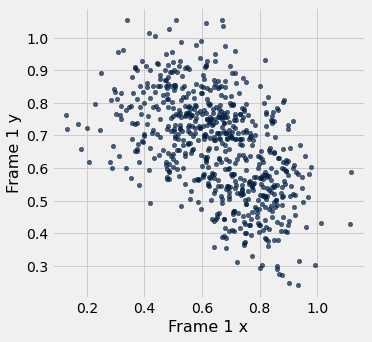

In [9]:
train_two_features.scatter("Frame 1 x", "Frame 1 y")

This isn't useful because we don't know which dots are which movement type.  We need to tell Python how to color the dots.  Let's use gold for vertical and blue for horizontal movements.

`scatter` takes an extra argument called `colors` that's the name of an extra column in the table that contains colors (strings like "red" or "orange") for each row.  So we need to create a table like this:

|Frame 1 x|Frame 1 y|Movement type|Color|
|-|-|-|-|
|0.522768|0.769731|vertical straight-line|gold|
|0.179546|0.658986|horizontal straight-line|blue|
|...|...|...|...|

#### Question 4
In the cell below, create a table named `with_colors`.  It should have the same columns as the example table above, but with a row for each row in `train_two_features`.

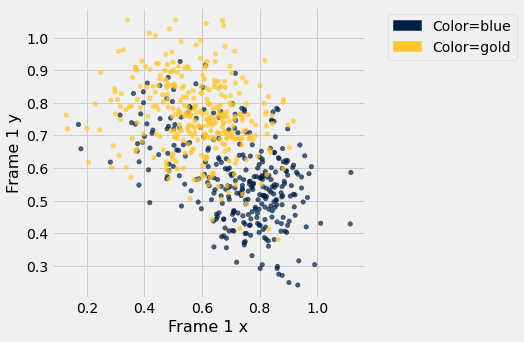

In [11]:
# You should find the following table useful.
type_to_color = Table().with_columns(
    "Movement type", make_array("vertical straight-line", "horizontal straight-line"),
    "Color",         make_array("gold",                   "blue"))

with_colors = train_two_features.join("Movement type", type_to_color, "Movement type")
with_colors.scatter("Frame 1 x", "Frame 1 y", colors="Color")

In [12]:
_ = tests.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
 > Suite 1 > Case 1

>>> sorted(with_colors.labels)
['Color', 'Frame 1 x', 'Frame 1 y', 'Movement type']
>>> with_colors.num_rows == train_movements.num_rows
True
>>> with_colors.sort("Frame 1 x").take(np.arange(5)).column("Color")
array(['gold', 'gold', 'blue', 'blue', 'gold'], dtype='<U4')

# Error: expected
#     array(['gold', 'gold', 'blue', 'blue', 'gold'], 
#           dtype='<U4')
# but got
#     array(['gold', 'gold', 'blue', 'blue', 'gold'], dtype='<U4')

Run only this test case with "python3 ok -q q1_4 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



#### Question 5
Based on the scatter plot, how well will a nearest-neighbor classifier based on only these 2 features (the x- and y-coordinates of the hand position in the first frame) work?  Will it:

1. distinguish almost perfectly between vertical and horizontal movements;
2. distinguish somewhat well between vertical and horizontal movements, getting some correct but missing a substantial proportion; or
3. be basically useless in distinguishing between vertical and horizontal movements?

Why?

*Be basically useless in distinguishing between vertical and horizontal movements.
 Just one position can't predict the trend of it.*

#### Question 6
Imagine training a 1-nearest-neighbor classifier on this data.  For an example with first-frame coordinates (0.8, 0.9), what are the (rough) coordinates of the nearest point in the training set, and what is its class?

*Vertical straight-line.*

### A classifier
Now let's do nearest-neighbor classification.  In the interest of time, we'll do some of the steps for you.  Your job will be to *read and understand the given code* and use it to complete the classifier.

In the following cell, we've defined three functions.  They're documented in the cell itself.  Unless you want to write your own classifier from scratch, use these to help you answer the next question.

In [14]:
def euclidean_distance(a, b):
    """
    The Euclidean distance (ordinary straight-line distance) between
    the numbers in arrays a and b.
    
    You don't need to use this function; it's designed to be used
    by the k_nearest_rows function below.
    """
    return sum((a - b)**2)**0.5

def k_nearest_rows(attributes, data, k):
    """
    The k nearest neighbors in the data table to an observation with the given attributes.
    
    This function takes 3 arguments:
     * attributes: An array of numbers, each one an attribute of the
       observation whose neighbors we're finding.
     * data: A table with many rows.  The columns in this table are
       the attributes of the data (the same as the elements of the
       attributes array), except that the last column is a label,
       not a feature.  So data.num_columns should be 1 bigger than
       len(attributes).
     * k: The number of neighbors to find.
    
    It returns a table containing the k rows of data whose attributes
    are closest in Euclidean distance to the attributes array.  The
    returned table has the same columns as the data table.
    """
    distances = make_array()
    data_without_labels = data.drop(data.num_columns-1)
    for i in np.arange(data.num_rows):
        training_example_attributes = np.array(data_without_labels.row(i))
        distance = euclidean_distance(attributes, training_example_attributes)
        distances = np.append(distances, distance)
    
    return data.with_column("distance to observation", distances)\
               .sort("distance to observation")\
               .take(np.arange(k))\
               .drop("distance to observation")

def most_common(things):
    """
    The most common element in an array of anything.
    
    This function takes 1 argument:
     * things: An array containing any kind of data.
    
    It returns the most common element of that array.  For example,
      most_common(make_array(0, 1, 1, 2, 1))
    is 1, and
      most_common(make_array("the", "I", "a", "I"))
    is "I".  If there's a tie, one of the most common elements is
    chosen arbitrarily.  If the array is empty, an error will
    happen.
    """
    counts = Table().with_column("things", things).group("things")
    return counts.sort("count", descending=True).column(0).item(0)

#### Question 7
Below is the skeleton of a function that classifies examples as either vertical straight-line movements or horizontal straight-line movements.  Fill it in so that it does what its documentation promises.

*Hint:* Use the functions we've defined for you.

In [16]:
# Fill in this function.
def classify(attributes, training_data, k):
    """
    Classifies an observation with the given attributes.
    
    This function takes three arguments:
     * attributes: An array of numbers.  Each is an attribute of a
       movement.
     * training_data: A table of observations.  Must have one column
       for each attribute in the attributes array, *plus* one column
       at the end containing the true class of each observation.
     * k: The number of neighbors to look at.
    
    It returns a string, which is the name of the movement
    type we guess for the given movement.
    
    We compute this classification by k-nearest-neighbors.  Our
    training data (the data in which we look for neighbors) is the
    given training_data table.
    """
    top_k = k_nearest_rows(attributes, training_data, k)
    return most_common(top_k.column("Movement type"))

### Verifying that `classify` doesn't have bugs

#### Question 8
Verify that `classify` works as expected by replicating the simple example in question 6.  That is, classify an hypothetical movement with first-frame coordinates (0.8, 0.9), using a 1-nearest neighbor classifier with `train_two_features` as the training set.  Give the name `example_1NN_classification` to the predicted class of the observation.  Make sure it matches your answer to question 6!

In [17]:
example_1NN_classification = classify(make_array(0.8, 0.9), train_two_features, 1)
example_1NN_classification

'vertical straight-line'

#### Question 9
Using the scatter plot you made in question 4, find a movement that would be classified as horizontal by a ***3***-nearest neighbor classifier, again with `train_two_features` as the training set.  Verify that `classify` produces the expected classification for that movement.

In [18]:
example_3NN_classification = classify(make_array(0.83, 0.4), train_two_features, 3)
example_3NN_classification

'horizontal straight-line'

### Testing the accuracy
Let us compute the accuracy of our classifier.

First, we'll continue to imagine we have only 2 features rather than the full 90.  This will verify your answer to question 5.

The next cell defines a function called `classify_all`.  It will be useful in answering the next question, so read its documentation.

In [19]:
def classify_all(test_data, training_data, k):
    """
    Classifies each observation in test_data, using k-nearest neighbors with training_data.
    
    This function takes three arguments:
     * test_data: A table of observations.  Each row contains the
       attributes of one movement.  There should be no extra columns;
       in particular, this table shouldn't include a column with the
       true classes.
     * training_data: A table of observations.  Must have one column
       for each attribute in the test_data table, *plus* one column
       at the end containing the true class of each observation.
     * k: The number of neighbors to look at.
    
    It returns an array of strings, the classification of each row
    in test_data.
    
    We compute these classification by k-nearest-neighbors.  Our
    training data (the data in which we look for neighbors) is the
    given training_data table.
    """
    classifications = make_array()
    for i in np.arange(test_data.num_rows):
        classification = classify(
            np.array(test_data.row(i)),
            training_data,
            k)
        classifications = np.append(classifications, classification)
    return classifications

#### Question 10
Create a table called `test_two_features` containing the observations in `test_movements` with only the first 2 features. This table should have the same columns as `train_two_features`. Compute the classifications of those observations using a 3-nearest neighbor classifier with `train_two_features` as the training set.  Then compute the proportion of those observations that are correct.

**Note:** This might take around a minute.

In [20]:
test_two_features = test_movements.select("Frame 1 x", "Frame 1 y")
# "Frame 1 x", "Frame 1 y", "Movement type"
two_features_classifications = classify_all(test_two_features, train_two_features, 3)
two_features_proportion_correct = np.count_nonzero(test_movements.column("Movement type") == two_features_classifications)/len(two_features_classifications)
two_features_proportion_correct

0.7566666666666667

Does that match what you wrote in question 5?

Now let's try out the classifier with all 90 features.  We'd expect this to work better, because we're giving the classifier more information about each example.  (We've seen that some horizontal movements and vertical movements start out in the same place, but hopefully by the last frame those movements end up in very different places.)

#### Question 11
Compute the accuracy of a 3-nearest neighbor classifier using `train_movements` as the training set and `test_movements` as the test set, *when all 90 features are used*.

**Note:** This will take a few minutes.

In [21]:
test_all_features = test_movements.drop("Movement type")
all_features_classifications = classify_all(test_all_features, train_movements, 3)
proportion_correct = np.count_nonzero(test_movements.column("Movement type") == all_features_classifications)/len(all_features_classifications)
proportion_correct

0.9833333333333333

If you're interested, the next cell displays the movements in the test set that your classifier got wrong.  Would you have done better yourself?

In [22]:
wrong_examples = np.flatnonzero(all_features_classifications != test_movements.column("Movement type"))
interact(
        display_hand,
        example={str(i+num_train): i+num_train for i in wrong_examples},
        frame=widgets.IntSlider(min=1, max=int((movements.num_columns-1)/2), step=1, value=1, msg_throttle=1),
        display_truth=fixed(True));

interactive(children=(Dropdown(description='example', options={'680': 680, '747': 747, '764': 764, '772': 772,…

#### Question 12
Would you predict that the accuracy would go up or down (relative to the result in question 11) if we used `train_movements` as both the training set and the test set?  Why?  You can try it yourself to verify your answer.

*Yes and up! The correct answer will also be trained!!!*

You're done!  If you want more practice, try rewriting the `most_common` or `k_nearest_rows` functions for yourself.
<div class="hide">\pagebreak</div>

## 2. Testing Relationship Ratings


Throughout this part of the homework, we will be interested in learning how different factors can contribute to the rating couples give their relationship, on a scale of 1-5 (1 being most satisfied, and 5 being the least). 

To do this, we will be looking at the table that is loaded below. 

*Note:* The data in this table is quite dated. It only includes heterosexual relationships. A better dataset would contain a more accurate sample of couples. When drawing conclusions from data, it is important to be aware of biases that exist in the dataset.

In [23]:
couples = Table.read_table('couples.csv')
couples 

ID,Gender,Marital Status,Relationship Rating,Age,Education,Household Income,Employment Status
0,male,married,1,51,Bachelor's degree,"75,000 to 84,999",working as paid employee
0,female,married,1,53,High school graduate - diploma or the equivalent (GED),"75,000 to 84,999",working as paid employee
1,male,married,1,57,Associate degree,"85,000 to 99,999",working as paid employee
1,female,married,1,57,High school graduate - diploma or the equivalent (GED),"85,000 to 99,999",working as paid employee
2,male,married,1,60,Bachelor's degree,"75,000 to 84,999",working as paid employee
2,female,married,1,57,"Some college, no degree","75,000 to 84,999",working as paid employee
3,male,married,1,62,High school graduate - diploma or the equivalent (GED),"35,000 to 39,999","working, self-employed"
3,female,married,1,59,High school graduate - diploma or the equivalent (GED),"35,000 to 39,999",working as paid employee
4,male,married,2,53,"Some college, no degree","125,000 to 149,999",not working - other
4,female,married,2,61,"Some college, no degree","125,000 to 149,999",not working - retired


Looking at the table above, we note that we should be able to test whether different factors can affect the relationship rating, from age to education. To begin, we are first going to investigate whether marital status has an effect on relationship rating. In order to accomplish this, we are going to do a permutation test! 

**Question 1** 

State the null and alternative hypothesis for such a test (assume we aren't trying to figure out ***how*** marital status affects relationship rating, just whether or not it does). 

**Answer:**

Null hypothesis: marital status NOT affects relationship rating.

Alternate hypothesis: marital status affects relationship rating!

**Question 2** 

Before we continue, we will have to talk about the notion of a contingency table. 

Define `contingency` to be a table where the rows represent unique values of the relationship ratings, the columns represent the unique values of marital status present in the table, and the values in each cell represent the number of individuals with a given marital status and relationship rating.

*Hint:* Use `pivot`.

In [34]:
contingency = couples.pivot(2, 3)
contingency

Relationship Rating,married,partner
1,1023,290
2,373,229
3,39,26
4,35,30
5,14,7


In [35]:
_ = tests.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3** 

It is difficult to identify a pattern in the above table, since our table has so many more married people than it does unmarried. To rectify this, we will instead compute proportions. 

Assign `contingency_prop` to a table with the same columns and rows, but the values are instead in proportions, i.e. the value in the cell corresponding to a relationship rating of 1 and marital status of "married" should be the proportion of married people who gave their relationship a 1. 

In [36]:
#The staff solution took 5 lines
married_prop = contingency.column(1) / contingency.column(1).sum()
partner_prop = contingency.column(2) / contingency.column(2).sum()
contingency_prop = contingency.select(1).with_columns(
    "married", married_prop, "partner", partner_prop
)
contingency_prop

married,partner
0.689353,0.498282
0.251348,0.393471
0.0262803,0.0446735
0.0235849,0.0515464
0.00943396,0.0120275


**Question 4** 

Assign `tvd_marriages` to the total variational distance between the distributions of married people's relationship ratings and unmarried people's relationship ratings. 

In [42]:
tvd_marriages = sum(abs(married_prop - partner_prop)) / 2
tvd_marriages

0.19107131278887746

In [43]:
_ = tests.grade('q2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5** 

Let's get more general now. Define `tvd` which takes in 

- any table like `couples`
- `conditions`: the name of a column like Relationship Rating
- `values`: the name of a column like Marital Status

The function should return the total variation distance between the distribution of conditions in the first unique value of values and the distribution of conditions in the second unique value of values (assume there are only two unique values)

***Hint***: This looks daunting, but you are just generalizing your code from above. 

In [52]:
def tvd(t, conditions, values):
    contingency = t.pivot(values, conditions)
    x = contingency.column(1) / contingency.column(1).sum()
    y = contingency.column(2) / contingency.column(2).sum()
    return sum(abs(x - y)) / 2

tvd(couples, 'Relationship Rating', 'Marital Status')

0.19107131278887746

**Question 6** 

Now that we have a valid test statistic, fill in the implementation of `permutation_test` below. It should run a permutation test to check whether conditions and values are related, where conditions and values are defined as above. See section [16.1](https://www.inferentialthinking.com/chapters/16/1/two-categorical-distributions.html) for details about the permutation test.

The inputs to the function are:

- `t`: a table containing our data
- `conditions`: the name of the column in `t` representing our conditions
- `values`: the name of the column in `t` representing our conditions
- `repetitions`: the number of permutations we'd like to test
- `statistic`: a test statistic function (such as `tvd`). 

The return value should be the p-value of seeing the observed value assuming the null hypothesis. Fill in the implementation as necessary; we have also provided code which allows you to see an empirical histogram of the distribution under the null. 

0.585

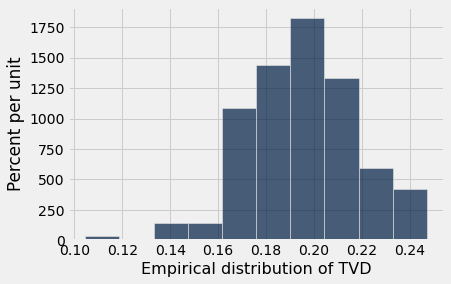

In [60]:
def permutation_test(t, conditions, values, repetitions , statistic):
    stats = make_array()

    for i in np.arange(repetitions):
        shuffled = t.sample()
        shuffled_table = Table().with_columns(conditions, t.column(conditions), values, shuffled.column(values))
        stats = np.append(tvd(shuffled, conditions, values), stats)
    observation = tvd(t, conditions, values)
    p_value = np.count_nonzero(stats > observation) / len(stats)
    
    Table().with_column('Empirical distribution of TVD', stats).hist()
    return p_value 

permutation_test(couples, 'Relationship Rating', 'Marital Status', 200, tvd)

**Question 7** 

Based on the above method, should we reject the null hypothesis that the relationship ratings and marital status areun correlated, or should we fail to reject? Why?


*Null!.*

<div class="hide">\pagebreak</div>

## 3. Review of Table Methods


In this question, we are going to be going over some important table concepts that might be useful for the project. The dataset we will be using is `twitter_follows.csv`, which you can load below. 

In [61]:
twitter_follows = Table.read_table('twitter_follows.csv')
twitter_follows 

Screen name,Followers,Friends
LeoDiCaprio,1.40822e+07,142
SteveCarell,4.60758e+06,48
MarkRuffalo,2.16511e+06,1178
amyschumer,3.45233e+06,1931
TherealTaraji,3.96039e+06,702
azizansari,9.37407e+06,0
Racheldoesstuff,31996,3341
IAMQUEENLATIFAH,6.89094e+06,458


**Question 1**

Assign `least_followed` to the screename of the person who has the fewest followers. Do this using code; do not just inspect the table. 

In [63]:
least_followed = twitter_follows.sort(1).column(0).item(0)
least_followed

'Racheldoesstuff'

**Question 2** 

Assign `most_followed` to the screename of the person who has the most followers now. 

In [64]:
most_followed = twitter_follows.sort(1, descending=True).column(0).item(0)
most_followed

'LeoDiCaprio'

**Question 3** 

Assign `avg_friends` to be the average number of friends across all of these users. 

In [65]:
avg_friends = np.mean(twitter_follows.column(2))
avg_friends

975.0

**Question 4** 

Define a function `comparison` which takes in a value and checks whether or not it's above `avg_friends`. If the value is greater than or equal to the average amount of friends, it returns True, otherwise False. 

In [67]:
def comparison(val):
    return val >= avg_friends
comparison(1000)

True

**Question 5** 

Using apply, assign `avg_comparison` to a table which has an extra column called "Above Average?" which is values of true or false corresponding to whether or not the user has more or less friends than the average. Think about using the function you defined above, you **must** use apply for this question. 

In [68]:
above_avg_array = twitter_follows.apply(comparison, 2)
avg_comparison = twitter_follows.with_column('Above Average?', above_avg_array)
avg_comparison

Screen name,Followers,Friends,Above Average?
LeoDiCaprio,1.40822e+07,142,False
SteveCarell,4.60758e+06,48,False
MarkRuffalo,2.16511e+06,1178,True
amyschumer,3.45233e+06,1931,True
TherealTaraji,3.96039e+06,702,False
azizansari,9.37407e+06,0,False
Racheldoesstuff,31996,3341,True
IAMQUEENLATIFAH,6.89094e+06,458,False


<div class="hide">\pagebreak</div>

## 4. The Gravity of Overfitting


Imagine you are an early natural scientist trying to understand how fast things fall.  You run experiments in which you drop an iron ball from a very tall cliff.  You want to know the relationship between the length of time (in seconds) the ball has been dropping and the distance the ball has fallen (in meters).  Isaac Newton will later predict, using calculus and a model of physics, that the relationship is

$$\text{distance fallen} = 0 + 0 \times (\text{time spent falling}) + \frac{g}{2} \times (\text{time spent falling})^2,$$

where $g$ is a constant related to the gravity of Earth.  But that hasn't happened yet.

You drop your iron ball 7 times from the cliff.  Each time, you choose a time between 0 and 3 seconds (uniformly at random) and measure how far the ball has fallen after that long.  Your distance measurements rely on a human assistant with a stopwatch standing on the ground, so they are somewhat noisy.  That is, their measurements of the distance fallen aren't exactly equal to the actual distance fallen, but they're kinda close.

You have three hypotheses:
1. Distance is a linear function of falling time.  That means $\text{distance fallen} = b + a \times \text{(time spent falling)}$ for some numbers $a$ and $b$.
2. Distance is a quadratic function of falling time.  That means $\text{distance fallen} = c + b \times \text{(time spent falling)} + a \times \text{(time spent falling)}^2$ for some numbers $a$, $b$, and $c$.
3. Distance is a 6th-degree ("hexic") polynomial function of falling time.  (A 6th-degree polynomial has 7 parameters and can "wiggle around" a lot more than a linear or quadratic function.  You don't need to know anything else about polynomials to work on this question.)

To test your hypotheses, you decide to find the function that fits the data most closely under each hypothesis - that is, the linear, quadratic, or 6th-degree polynomial function with the smallest mean squared error for these 7 points.

The cell below loads the data, finds the best-fitting linear, quadratic, and 6th-degree polynomial functions for the dataset, and plots them.  (You don't need to know what it's doing, but the part that calls `minimize` should look somewhat familiar.)

Best-fit degree-1 polynomial: -6.196 +  14.12*x
Best-fit degree-2 polynomial: 0.7151 + -1.101*x +  5.243*x^2
Best-fit degree-6 polynomial: -0.8185 +  16.81*x + -34.03*x^2 +  8.166*x^3 +  34.90*x^4 + -25.46*x^5 +  4.801*x^6


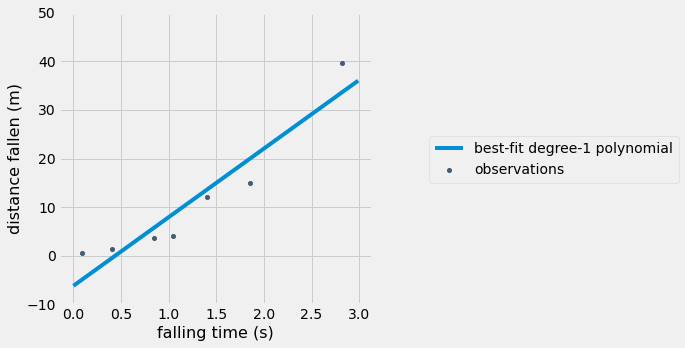

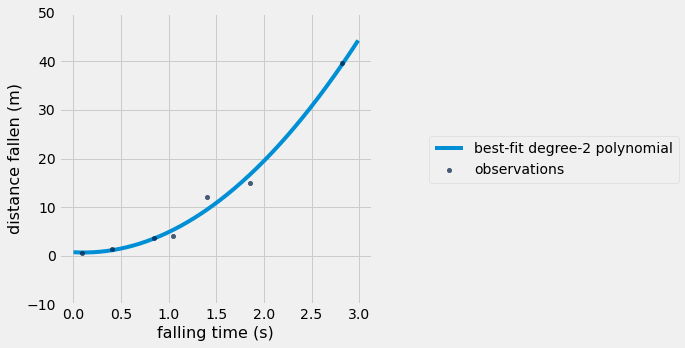

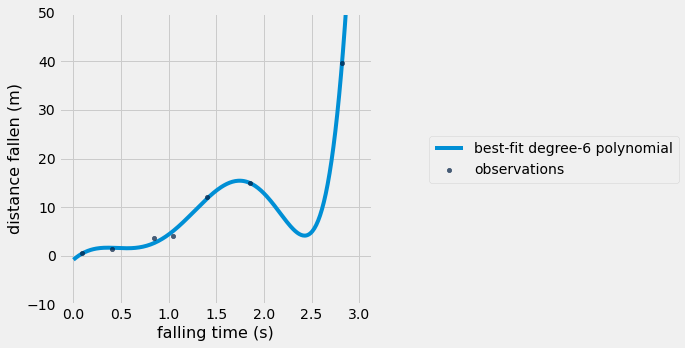

In [69]:
falls = Table.read_table("falls.csv")

def polynomial(coefficients, x):
    """The value of a polynomial with the given coefficients, for input x."""
    num_coefficients = len(coefficients)
    powers_of_x = x**np.arange(num_coefficients)
    return sum(coefficients * powers_of_x)

def polynomial_predictions(coefficients, x_values):
    """The values of a polynomial with the given coefficients, for each value in the array x_values."""
    def prediction(x):
        return polynomial(coefficients, x)
    return Table().with_columns("x", x_values).apply(prediction, "x")

def mse(coefficients):
    """The mean squared error when we use a polynomial with the given coefficients to predict distance fallen."""
    predictions = polynomial_predictions(coefficients, falls.column("falling time (s)"))
    return np.mean(((predictions - falls.column("distance fallen (m)")))**2)

def print_polynomial(coefficients):
    xs = ["*x^" + str(power) if power > 1 else "*x" if power == 1 else "" for power in np.arange(len(coefficients))]
    print("Best-fit degree-{:d} polynomial:".format(len(coefficients)-1),
          " + ".join(["{0: >#06.4g}".format(c) + x for c, x in zip(coefficients, xs)]))

def plot_polynomial(coefficients):
    """Plot the data, plus a polynomial with the given coefficients."""
    falling_times = np.arange(0, 3, .01)
    predictions = polynomial_predictions(coefficients, falling_times)
    falls.scatter(0, zorder=10, label="observations")
    plt.plot(falling_times, predictions, label="best-fit degree-{:d} polynomial".format(len(coefficients)-1))
    plt.legend(bbox_to_anchor=make_array(2, .6))
    plt.ylim(-10, 50)

for num_coefficients in make_array(2, 3, 7):
    best_polynomial = minimize(mse, start=np.zeros(num_coefficients), array=True, method='SLSQP', options={'ftol': 1e-10})
    print_polynomial(best_polynomial)
    plot_polynomial(best_polynomial)

**Note:** The 6th-degree polynomial doesn't actually have a discontinuity between 2.1 and 2.7; it just varies so sharply that we couldn't fit the whole curve on the same scale as the linear and quadratic curves without making those curves look very flat.)

#### Question 1
By examining the three plots, rank the curves by mean squared residual on the 7 data points, least to greatest.  If you think there is a tie between any of the curves, say that.

*6th-degree < polynomial < linear.*

You aren't convinced by the results of this experiment, so you decide to run a second copy.  You drop 7 iron balls for random amounts of time between 0 and 3 seconds and record the distance fallen.  Then you check how accurately the three functions computed above (the same 3 curves pictured in the plots) predicted the distance fallen for these 7 new trials.  You compute the MSE for each one.

#### Question 2
Rank the 3 curves by the mean squared error you'd *expect* to see for these 7 new trials, least to greatest.  If you think there is a tie between any of the curves, say that.

*polynomial < linear < 6th-degree*

The problem with the 6th-degree polynomial is that it's able to "wiggle around" too much to fit the data we train it on.  1-nearest neighbor classifiers have an analogous problem.

The cell below loads a (synthetic) dataset about art forgery.  Each row is a painting that is either a forgery or an original painting by the (fictional) Impressionist artist Edgar Detas.  Brush strokes are thought to be highly personal and difficult to replicate, so for each painting, we have measured two characteristics: the average width of brush strokes (in millimeters) and the average length of brush strokes (also in millimeters).

Gold dots represent real paintings. Blue dots represent forgeries.

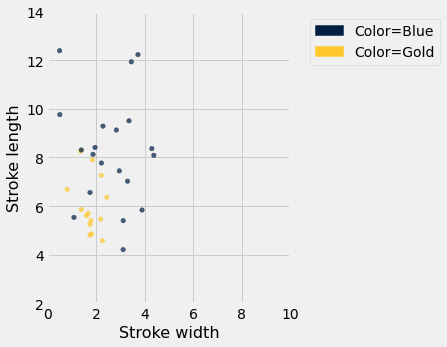

In [70]:
forgeries_sample = Table.read_table("forgeries_sample.csv")
forgeries_sample.scatter("Stroke width", "Stroke length", colors="Color")

def set_graph_dimensions():
    # This function just sets the width and height of the graph.
    # We define it here so we can reuse it in the next cell.
    plt.xlim(0, 10)
    plt.ylim(2, 14)
    plt.gca().set_aspect('equal', adjustable='box')

set_graph_dimensions()

The next cell shows the decision regions of a 1-nearest neighbor classifier and a 5-nearest neighbor classifier on this dataset.

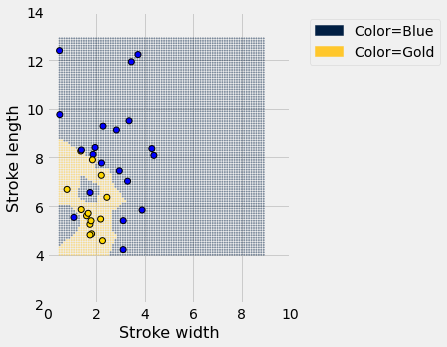

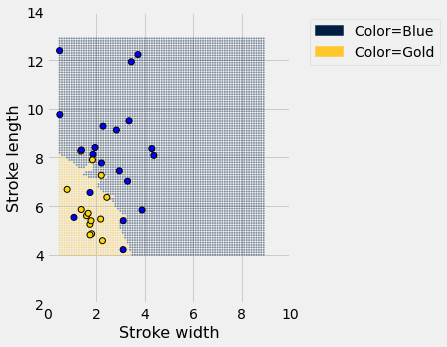

In [72]:
def make_classifier(k, training):
    """Train a k-NN classifier on the given art training data."""
    attributes = training.select("Stroke width", "Stroke length").to_df().values
    classes = training.column("Forgery")
    def classify(w, l):
        distances = np.sum((attributes - make_array(w, l))**2, axis=1)
        closest_example_indices = np.argsort(distances)[:k]
        return 2*sum(classes[closest_example_indices]) >= k
    return classify

def display_decision_region(classifier):
    xs = np.arange(.5, 9, .1)
    ys = np.arange(4, 13, .1)
    x_grid, y_grid = np.meshgrid(xs, ys)
    decisions = Table().with_columns(
        "Stroke width", x_grid.flatten(),
        "Stroke length", y_grid.flatten())
    decisions = decisions\
        .with_column("Forgery", decisions.apply(classifier, make_array(0, 1)))\
        .join("Forgery", Table().with_columns("Forgery", make_array(0, 1), "Color", make_array("Gold", "Blue")))\
        .select("Stroke width", "Stroke length", "Color")
    decisions.scatter("Stroke width", "Stroke length", colors="Color", alpha=.4, s=2)
    plt.scatter(
        forgeries_sample.column("Stroke width"),
        forgeries_sample.column("Stroke length"),
        c=forgeries_sample.column("Color"),
        lw=1,
        edgecolor="black")
    set_graph_dimensions()
    
one_nn = make_classifier(1, forgeries_sample)
five_nn = make_classifier(5, forgeries_sample)
display_decision_region(one_nn)
display_decision_region(five_nn)

#### Question 3
Suppose we use each classifier to classify the paintings in `forgery_sample`.  (Yes, the training set.)  Rank the classifiers by the proportion of **correct** guesses they make, **greatest to least**.  (Look at the plots generated by the cells above to answer this question.  You can run the classifiers to verify your answer if you want.)

*one < five.*

The decision region of the 1-nearest neighbor classifier is pocked with little holes.  For example, notice the two regions in the bottom-left where the 1-nearest neighbor classifier classifies paintings as forgeries.

#### Question 4
Suppose we find some **new** paintings.  We're not sure whether they are Detas originals or forgeries, so we ask our 2 classifiers.  For new paintings that fall in those two bottom-left regions, do the classifiers make different guesses?  If so, which classifier do you think makes better guesses?

*Maybe!*

<div class="hide">\pagebreak</div>

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [tests.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")